In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

## Načtení a spojení dat

In [4]:
df = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [5]:
len(df)

47419

In [6]:
df

,rok,titul,autorstvo,autorstvo_kod
001,,,,
cpk20041494224,1804.0,Wesnického Faráře Rozmlauwánj s swými Osadniky,Rulík Jan,jk01103049
bknjje05009,1804.0,Mrawné propowjdky s prawdiwýma přjklady vtwrzené,Hanke z Hankenštejna Jan Alois,jk01033422
bknjaj17284,1807.0,Zrcadlo wýborného sedlského obcowánj předstawu...,Němeček František,None
nkc20051626328,1807.0,Ladislaw a djtky geho,Nejedlý Vojtěch,jk01082969
cpk20162825404,1808.0,"Cytara nowého zákona prawého Boha, w předrahýc...",Koniáš Antonín,jk01061522
...,...,...,...,...
nkc20243601181,2024.0,Slon v šuplíku,Nejedlý Jan,ola2003165587
nkc20243601189,2024.0,Kampak jedou Pepa s Edou?,Hegerová Vendula,ola2003204967
nkc20243601266,2024.0,Isabela a červené šípky,Peroutková Ivana,jn20000401963


In [7]:
autority = pd.read_parquet(os.path.join("data","aut_vyber.parquet"))

In [8]:
autority = autority.merge(pd.read_json(os.path.join('data_raw','wikidata_raw.json')), left_index=True, right_index=True, how="outer")

In [9]:
autority

,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,w_gender
aun2006372164,None,None,None,None,[aun2006372164],"[Ibn Ezra, Abraham,]",[asi 1092-1167.],[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN,NaN
aun2006372165,None,None,None,None,[aun2006372165],"[Abu Jusuf Jakub ben Ibrachim al-Kufi,]",[731-798.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nz a22 n 4500,NaN,NaN,NaN,NaN
aun2006372166,None,None,None,None,[aun2006372166],"[Abū al-Fatḥ ibn-Abī al-Ḥasan,]",[činný 14. století.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN,NaN
aun2006372167,None,None,None,None,[aun2006372167],"[Abū Maʿšar,]",[787-886.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Významné dílo arabské astrologie. Po světě ší...,None,cz a22 n 4500,NaN,NaN,NaN,NaN
aun2006372168,None,None,None,None,[aun2006372168],"[Adalwin,]",[činný 9. století.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zmp20241237237,None,None,[1969],None,[zmp20241237237],"[Comoglio, Silvia,]",[1969-],[1],None,None,None,[Itálie],None,"[italská poezie, literární činnost]",None,"[spisovatelky, básnířky]",[žena],[ita],None,None,None,None,None,None,None,None,None,None,None,None,[Italská spisovatelka a básnířka.],None,nz a22 n 4500,NaN,NaN,NaN,NaN
zmp20241237239,None,None,None,None,[zmp20241237239],"[Friedman, Neile Sue]",None,[1],None,None,None,[Spojené státy americké],None,"[holocaust (1939-1945), perzekuce, přeživší ho...",None,[soudkyně],[žena],[eng],None,None,None,None,None,None,None,None,None,None,None,None,[Americká soudkyně.],None,nz a22 n 4500,NaN,NaN,NaN,NaN
zmp20241237241,[isni],[0000000497681884],[1928],[2012],[zmp20241237241],"[Ayalon, Eliezer,]",[1928-2012],[1],None,None,None,"[Polsko, Izrael]",None,None,None,[průvodci],[muž],"[pol, eng]","[Ayalon, Eli,]",[1928-2012],None,[1],None,None,None,None,None,None,None,None,[Polsko-izraelský průvodce a přeživší holocaust.],None,cz a22 n 4500,NaN,NaN,NaN,NaN
zmp20241237246,"[isni, wikidata]","[0000000109154514, Q7299117]",[1915],[1995],[zmp20241237246],"[Rosenthal, Raymond,]",[1915-1995],[1],None,None,None,[Spojené státy americké],None,"[překladatelská činnost, překlady z italštiny]",None,[překladatelé],[muž],"[eng, ita]",None,None,None,None,None,None,None,None,None,None,None,None,[Americký překladatel.],None,nz a22 n 4500,NaN,NaN,NaN,NaN


In [10]:
df = df.merge(autority, left_on="autorstvo_kod", right_index=True, how="left")

In [11]:
len(df)

47419

In [12]:
def dva_letopocty(y, z):
    try:
        return int(re.search(r'\d{4}',str(y)).group(0))
    except:
        return z

In [13]:
df['narozeni'] = df.apply(lambda row: dva_letopocty(row['046_f'], row['w_narozeni']), axis=1)

In [14]:
df['umrti'] = df.apply(lambda row: dva_letopocty(row['046_g'], row['w_umrti']), axis=1)

In [15]:
df['vek'] = df['rok'] - df['narozeni']

Kolik lidí má uvedený věk:

In [17]:
len(df[df['vek'].notnull()]) / len(df)

0.8594656150488201

In [18]:
def tri_gendery(gender_aut, gender_wikidata, aut):
    z = None
    if (str(gender_aut).split(" ")[0][-1] == 'á'):
        z = 'á'
    else:
        z = 'neá'
    if gender_wikidata != None:
        z = gender_wikidata
    try:
        for y in gender_aut:
            if y == 'muž':
                z = 'm'
            if y == 'žena':
                z = 'f'
    except:
        pass
    return z

In [19]:
df['w_gender'].dropna()

001
bknjje05009       m
nkc20051626328    m
cpk20162825404    m
bknzdr03509       m
nkc20061650437    m
                 ..
nkc20243600833    f
nkc20243600908    f
nkc20243600987    f
nkc20243601079    m
nkc20243632920    f
Name: w_gender, Length: 11143, dtype: object

In [20]:
df['gender'] = df.apply(lambda row: tri_gendery(row['375_a'],row['w_gender'],row['autorstvo']), axis=1)

Kolik lidí má uvedený gender:

In [22]:
len(df[df['gender'].isin(['m','f'])]) / len(df)

0.5144351420316751

In [23]:
len(df[df['gender'].notnull()]) / len(df)

0.514456230624855

In [24]:
df.groupby('gender').size()

gender
f       8048
m      16346
neá        1
dtype: int64

In [25]:
df[['autorstvo','375_a','gender','046_f','046_g','narozeni','umrti']].sample(20)

,autorstvo,375_a,gender,046_f,046_g,narozeni,umrti
001,,,,,,,
nkc20142586871,Pius,[muž],m,[1887],[1968],1887.0,1968.0
nkc20172958401,Tomášová Marie,None,NaN,[1929],None,1929.0,NaN
nkc20243616602,Boho Michaela,[žena],f,[1990],None,1990.0,NaN
nkc20091928527,Henych Jiří,None,NaN,[1960],None,1960.0,NaN
ck8904731,Vácha Jaroslav,None,NaN,[1921],None,1921.0,NaN
nkc20061659081,Fiala Luděk,[muž],m,[1956],None,1956.0,NaN
nkc20162836843,Hausvater Stanislav,[muž],m,[1962],None,1962.0,NaN
bk198202008,Černý Ivan,NaN,NaN,NaN,NaN,NaN,NaN
nos190243602,Vašíček Zdeněk,None,NaN,[1889],None,1889.0,NaN


## Explorace: gender

<Axes: xlabel='rok'>

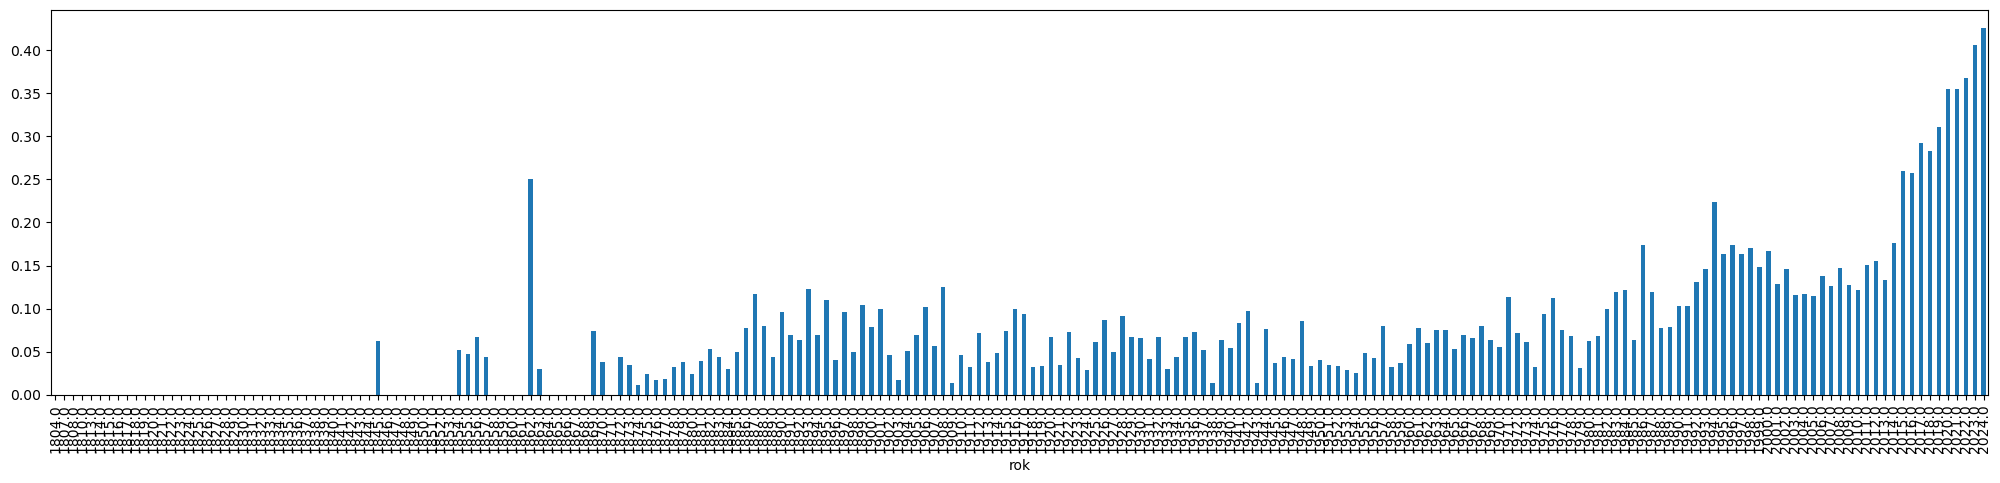

In [27]:
(df[df['gender'].isin(['á','f'])].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [28]:
kolikvyslo = df.groupby('rok').size()
kolikvyslo[kolikvyslo < 150].tail(1)

rok
1987.0    142
dtype: int64

In [29]:
(df[df['gender'].isin(['f','á'])].groupby('rok').size() / df[df['gender'].isin(['m','f','á','neá'])].groupby('rok').size()).tail(10)

rok
2015.0    0.445129
2016.0    0.417582
2017.0    0.456081
2018.0    0.452326
2019.0    0.465443
2020.0    0.512459
2021.0    0.514507
2022.0    0.522857
2023.0    0.550468
2024.0    0.570160
dtype: float64

In [30]:
(df[df['gender'] == 'f'].groupby('rok').size() / df[df['gender'].isin(['m','f'])].groupby('rok').size()).tail(10)

rok
2015.0    0.445129
2016.0    0.417582
2017.0    0.456081
2018.0    0.452326
2019.0    0.465443
2020.0    0.512459
2021.0    0.514507
2022.0    0.522857
2023.0    0.550468
2024.0    0.570160
dtype: float64

<Axes: xlabel='rok'>

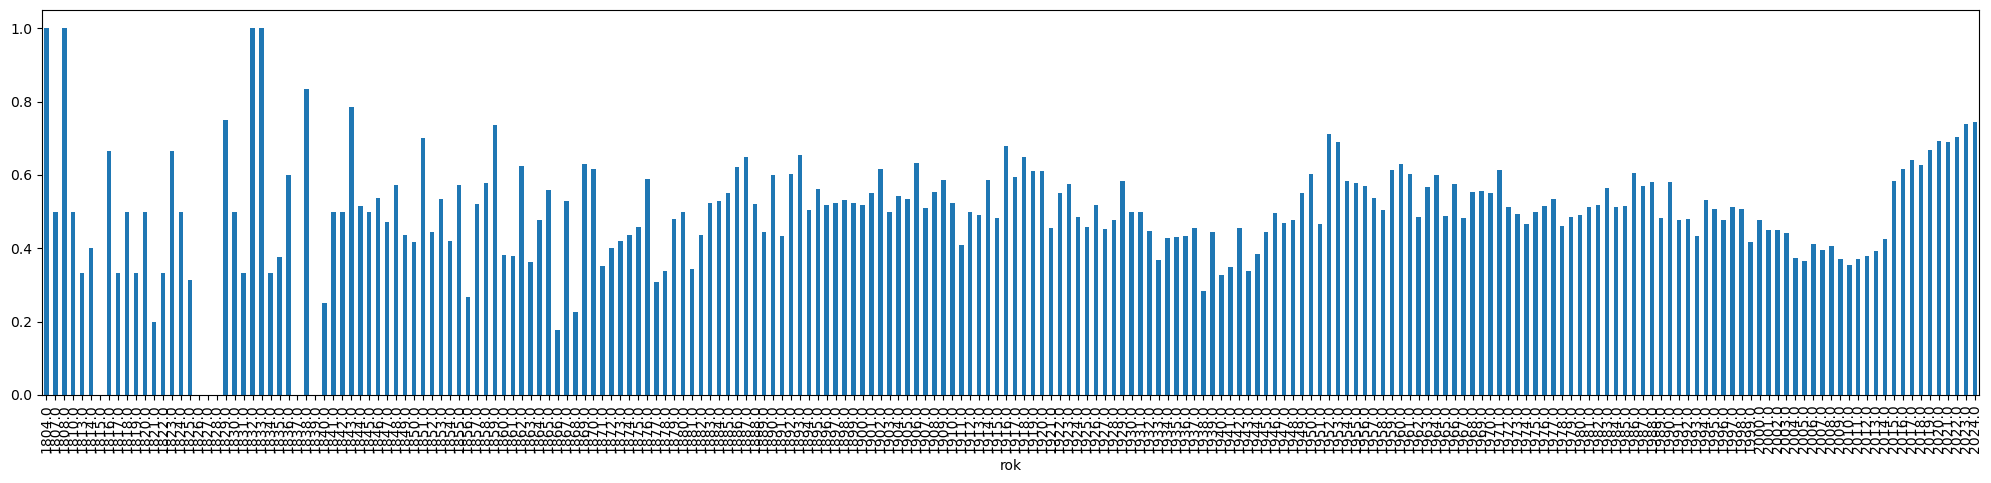

In [31]:
(df[df['gender'].isin(['m','f'])].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [32]:
df[(df['umrti'] < df['rok']) | (df['umrti'].isnull())].dropna(subset=['vek']).sort_values(by='vek',ascending=False)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,w_gender,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20132447903,2013.0,"Opravdu, vstal z mrtvých!",Jan Zlatoústý,jn20011024076,None,None,[0347],[0407],[jn20011024076],"[Jan Zlatoústý,]",[asi 347-407],[0],None,None,None,None,None,None,None,None,None,None,"[Ióannés Chrýsostomos,, Johannes Chrysostomus,...","[asi 347-407, asi 347-407, asi 347-407, asi 34...",None,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 0]",None,None,None,None,None,None,None,None,"[Patriarcha cařihradský, církevní učitel a spi...",[http://cs.wikipedia.org/wiki/Jan_Zlato%C3%BAs...,cz a22 n 4500,NaN,NaN,NaN,NaN,347.0,407.0,1666.0,NaN
bknjaj05933,1835.0,Swatého Jeronyma kagjcj rozgjmánj o neyswětěgš...,Jeroným,jn19981001563,None,None,[0342],[0420],[jn19981001563],"[Jeroným,]",[asi 342-420],[0],None,None,None,[Česko],None,None,None,None,None,None,"[Gerolamo,, Hieronymus Sophronius Eusebius,, J...","[asi 342-420, asi 342-420, asi 342-420, asi 34...",None,"[0, 0, 0, 1, 0, 0, 0, 0]",None,None,None,None,None,None,None,None,"[Církevní učitel, kněz, latinský církevní spis...",None,cz a22 n 4500,NaN,NaN,NaN,NaN,342.0,420.0,1493.0,NaN
cpk19960117599,1931.0,Dívčí válka,Dalimil,jk01021992,"[isni, wikidata]","[0000000055770820, Q1157937]",None,[1347],[jk01021992],"[Dalimil,]",[-asi 1347],[0],None,None,None,[Česko],None,None,None,None,None,None,"[Jindřich z Varnsdorfu,, Vilém Zajíc z Valdeka...","[-asi 1347, -asi 1347, -asi 1347]",None,"[0, 0, 1]",None,None,None,None,None,None,None,None,[Narozen asi ve druhé polovině 13. století. Šl...,None,cz a22 n 4500,Q1157937,1250.0,1400.0,m,1250.0,1347.0,681.0,m
nkc20051306503,2006.0,Život svaté Alžběty,Štítný ze Štítného Tomáš,jn19981002480,None,None,[1333],[1409],[jn19981002480],"[Štítný ze Štítného, Tomáš,]",[asi 1333-asi 1409],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Tomáš ze Štítného,, <<ze >>Štítného, Tomáš,]","[asi 1333-asi 1409, asi 1333-asi 1409]",None,"[0, 1]",None,None,None,None,None,None,None,None,"[Narozen asi 1333 ze Štítného, zemřel 1409 v P...",None,cz a22 n 4500,NaN,NaN,NaN,NaN,1333.0,1409.0,673.0,NaN
nkc20152722767,2015.0,Listy z Kostnice,Hus Jan,jk01043287,"[isni, wikidata]","[0000000118834634, Q43977]",[1371],[1415],[jk01043287],"[Hus, Jan,]",[asi 1371-1415],[1],None,"[Husinec, Prachatice, Česko]","[Kostnice, Německo]",[Česko],None,"[teologie, školství, reformace, literatura, li...",None,"[teologové, vysokoškolští učitelé, kazatelé, k...",[muž],"[cze, lat]","[Jan,, M. J. H.,, Mistr Jan Hus,, Constantius,...","[asi 1371-1415, asi 1371-1415, asi 1371-1415, ...","[None, None, None, Pseudonym:, None, None, Non...","[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen asi 1371 v Husinci u Prachatic, zemře...",[https://cs.wikipedia.org/wiki/Jan_Hus],cz a22 n 4500,Q43977,1369.0,1415.0,m,1371.0,1415.0,644.0,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20071748366,2007.0,"Pohádky postaviček, které chtějí poznat svět",Pelikánová Ester,jx20071106019,None,None,[2000],None,[jx20071106019],"[Pelikánová, Ester,]",[2000-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 6. 11. 2000 v Turnově. dětská autork...,None,cz a22 n 4500,NaN,NaN,NaN,NaN,2000.0,NaN,7.0,NaN
bkneli06814,1900.0,Vyvrženci,Prager Josef,jk01100877,None,None,[1893],None,[jk01100877],"[Prager, Josef,]",[1893-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 1.9.1893 v Praze. Strojník, prozaik, ...",None,nz a22 n 4500,NaN,NaN,NaN,NaN,1893.

In [33]:
df[df['vek'] > 110].sample(200)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,w_gender,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknjbs00027,1863.0,Bartošova Kronika pražská od léta Páně 1524 až...,Bartoš Písař,jk01010943,"[isni, wikidata]","[0000000061262742, Q809577]",[1470],[1535],[jk01010943],"[Bartoš Písař,]",[asi 1470-asi 1535],[0],None,None,None,[Česko],None,None,None,None,None,None,"[Bartholomäus von Sct. Aegidius,]",[asi 1470-asi 1535],None,[0],None,None,None,None,None,None,None,None,"[Narozen 1470 v Praze, zemřel asi 6. 5. 1535 v...",None,cz a22 n 4500,Q809577,1470.0,1535.0,m,1470.0,1535.0,393.0,m
nkc20172941273,2017.0,Pražské bahno,Kukla Karel Ladislav,jk01070762,"[isni, wikidata]","[0000000055355408, Q12028361]",[1863],[1930],[jk01070762],"[Kukla, Karel Ladislav,]",[1863-1930],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Sedlčanský, Karel K.,]",[1863-1930],[Pseudonym:],[1],None,None,None,None,None,None,None,None,"[Narozen 29.1.1863 v Sedlčanech, zemřel 29.10....",None,cz a22 n 4500,Q12028361,1863.0,1930.0,m,1863.0,1930.0,154.0,m
cpk19990651062,1998.0,Vidění sedmera dnů a planet,Váchal Josef,jk01141125,None,None,[1884],[1969],[jk01141125],"[Váchal, Josef,]",[1884-1969],[1],None,"[Milavče, Česko, Milavče, Česko]","[Studeňany, Radim, Jičín, Česko, Studeňany, Ra...","[Česko, Česko]","[None, Písek, Česko]","[výtvarné umění, literatura]",None,"[výtvarní umělci, malíři, grafici, ilustrátoři...",[muž],[cze],"[Bambas,, Bambas, V.,]","[1884-1969, 1884-1969]","[Pseudonym:, Pseudonym:]","[1, 1]",None,None,None,None,None,None,None,None,"[Narozen 23. 9. 1884 v Milavči u Domažlic, zem...",[https://cs.wikipedia.org/wiki/Josef_V%C3%A1chal],cz a22 n 4500,NaN,NaN,NaN,NaN,1884.0,1969.0,114.0,m
cpk20041277448,2003.0,Povídky a satiry,Gellner František,jk01032392,"[isni, wikidata]","[0000000110597996, Q709685]",[1881],[1914],[jk01032392],"[Gellner, František,]",[1881-1914],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 19.6.1881 v Mladé Boleslavi, padl v z...",None,nz a22 n 4500,Q709685,1881.0,1914.0,m,1881.0,1914.0,122.0,m
cpk20021198144,1992.0,Týden pohádek Boženy Němcové,Němcová Božena,jk01083016,"[isni, wikidata]","[0000000121343289, Q157970]",[1820],[1862],[jk01083016],"[Němcová, Božena,]",[1820-1862],[1],None,"[Vídeň, Rakousko]","[Praha, Česko]",[Česko],None,"[česká literatura, národní obrození, česká pró...",None,"[spisovatelky, publicistky]",[žena],[cze],"[Novotná, Barbora,, Panklová, Barbora,, Niemuz...","[1820-1862, 1820-1862, 1820-1862, 1820-1862, 1...","[Rodné jméno:, None, None, None, None, None, N...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozena zřejmě 4. 2. 1820 ve Vídni, zemřela ...",None,cz a22 n 4500,Q157970,1820.0,1862.0,f,1820.0,1862.0,172.0,f
nkc20223438330,2022.0,Chebské pověsti,Mladějovská Mira,jk01081865,"[isni, wikidata]","[000000005640366X, Q1937900]",[1899],[1969],[jk01081865],"[Mladějovská, Mira,]",[1899-1969],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 9. 3. 1899 v Praze, zemřela 9. 1. 19...",None,cz a22 n 4500,Q1937900,1899.0,1969.0,f,1899.0,1969.0,123.0,f
nkc20122371084,2012.0,Alfons Rodriguez,Škarek Leopold,jk01130292,None,None,[1874],[1968],[jk01130292],"[Škarek, Leopold,]",[1874-1968],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 10. 11. 1874 v Mysleticích, zemřel 23...",None,cz a22 n 4500,NaN,NaN,NaN,NaN,1874.0,1968.0,138.0,NaN
nkc20081820122,2008.0,O sedmi havranech,Fischerová-Kvěchová Marie,jk01031311,"[isni, wikidata]","[0000000082220955, Q18340260]",[1894],[1984],[jk01031311],"[Fis

## Explorace: věk

<Axes: xlabel='vek'>

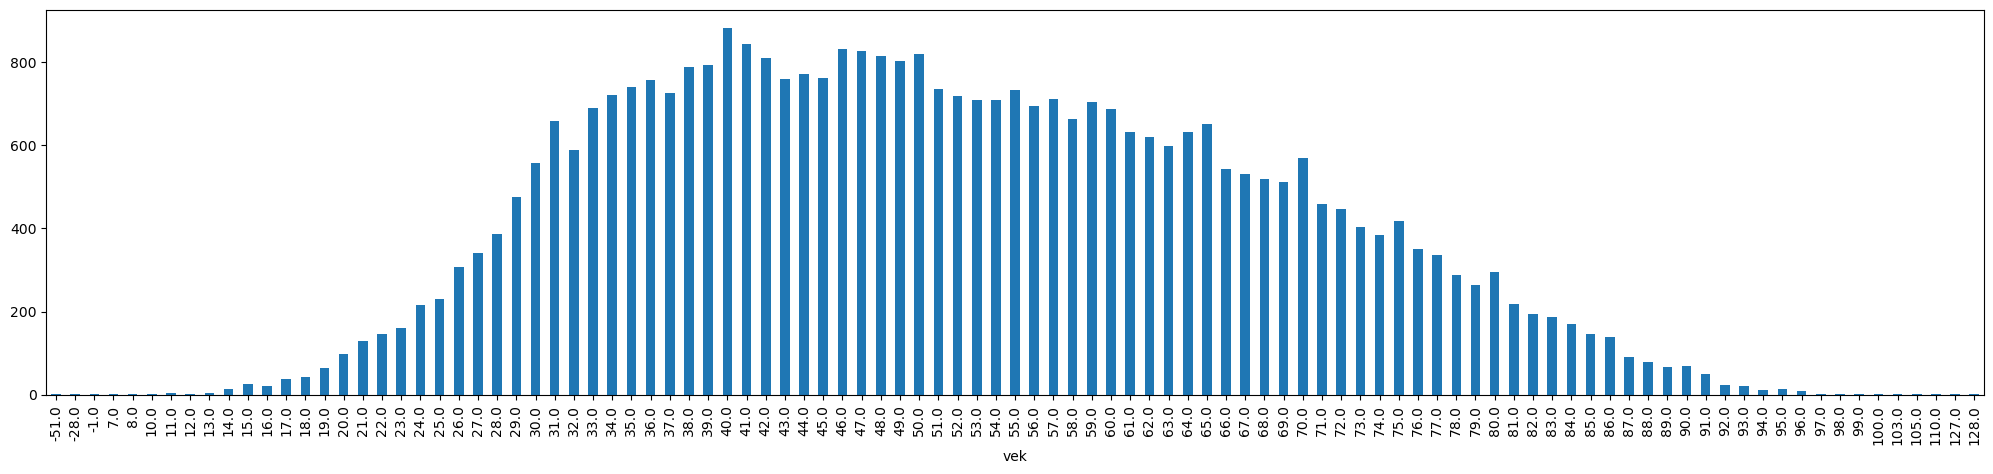

In [35]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())].groupby('vek').size().plot.bar(figsize=(25,5))

In [36]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())]['vek'].median()

50.0

<Axes: xlabel='vek'>

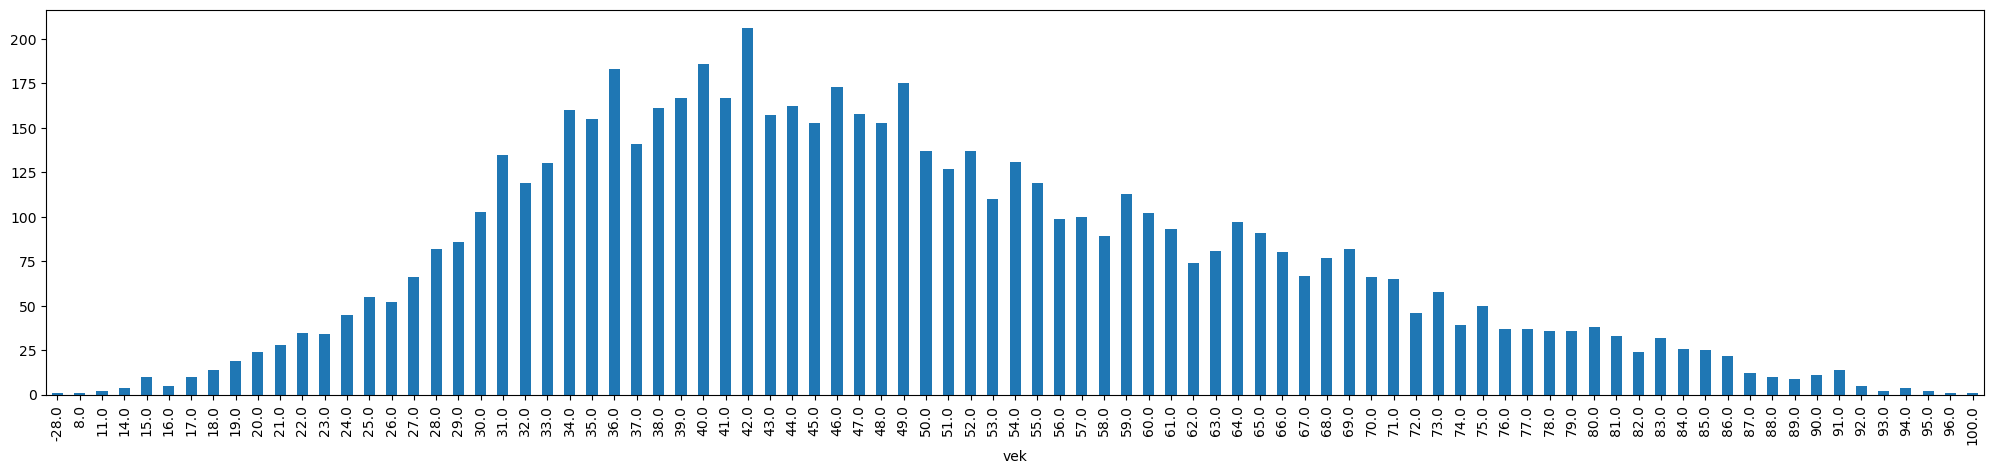

In [37]:
df[((df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())) & (df['gender'].isin(['f','á'])) ].groupby('vek').size().plot.bar(figsize=(25,5))

## Explorace: věk + gender

### Věky spisovatelstva publikujícího v letech 2020-24

In [40]:
df23 = df[df['rok'] >= 2020]

In [41]:
veky_muzu23 = df23[((df23['rok'] <= df23['umrti']) | (df23['narozeni'].notnull() & df23['umrti'].isnull())) & (df23['gender'].isin(['m','neá'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

In [42]:
veky_zen23 = df23[((df23['rok'] <= df23['umrti']) | (df23['narozeni'].notnull() & df23['umrti'].isnull())) & (df23['gender'].isin(['f','á'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

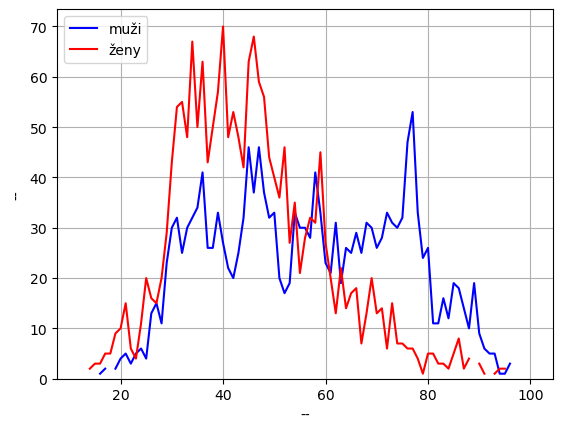

In [43]:
plt.plot(veky_muzu23, color="blue", label="muži")
plt.plot(veky_zen23, color="red", label="ženy")
plt.ylim(ymin=0)
plt.xlabel("--")
plt.ylabel("--")
plt.legend()
plt.legend(loc = "upper left")
plt.grid(True, which="both")
plt.show()

### Věky spisovatelstva, které debutovalo v letech 1995-2005

In [45]:
debuty = df.groupby('autorstvo_kod')['rok'].min()

In [46]:
debutanstvo_x = debuty[debuty.isin([x for x in range(1995,2005)])].index.to_list()

In [47]:
davne_autorstvo = df[df['rok'] < 1980]['autorstvo_kod'].drop_duplicates().to_list()
df2 = df[~df['autorstvo_kod'].isin(davne_autorstvo)]

In [48]:
df2 = df[df['autorstvo_kod'].isin(debutanstvo_x)]

In [49]:
veky_muzu = df2[((df2['rok'] <= df2['umrti']) | (df2['narozeni'].notnull() & df2['umrti'].isnull())) & (df2['gender'].isin(['m','neá'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

In [50]:
veky_zen = df2[((df2['rok'] <= df2['umrti']) | (df2['narozeni'].notnull() & df2['umrti'].isnull())) & (df2['gender'].isin(['f','á'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

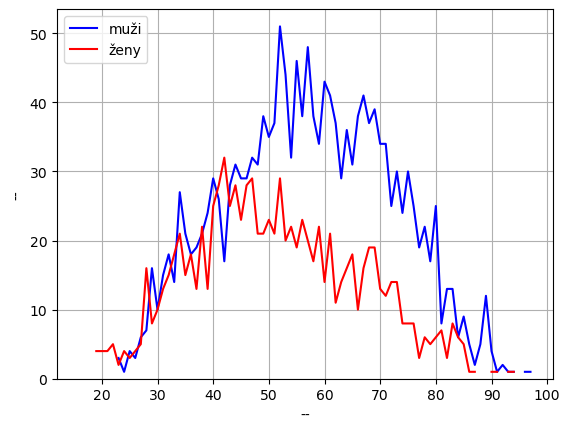

In [51]:
plt.plot(veky_muzu, color="blue", label="muži")
plt.plot(veky_zen, color="red", label="ženy")
plt.ylim(ymin=0)
plt.xlabel("--")
plt.ylabel("--")
plt.legend()
plt.legend(loc = "upper left")
plt.grid(True, which="both")
plt.show()

In [52]:
df.sort_values(by='vek').head(30)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,w_gender,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknjms02100,1889.0,Z přírody,Doubek František,jk01022862,None,None,[1940],[2011],[jk01022862],"[Doubek, František,]",[1940-2011],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 21. 4. 1940 v Milevsku, zemřel 11. 12...",None,cz a22 n 4500,NaN,NaN,NaN,NaN,1940.0,2011.0,-51.0,NaN
bk197201252,1972.0,V hudbě život,Kadlecová Marie Magdalena,jk01052463,"[isni, wikidata]","[0000000055603432, Q15928217]",None,None,[jk01052463],"[Kadlecová, Marie Magdalena]",None,[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Beletristka, autorka knih pro děti a biografi...",None,cz a22 n 4500,Q15928217,2000.0,NaN,f,2000.0,NaN,-28.0,f
bknhra07814,1928.0,Na zapřenou,Sedláčková Anna,mzk2005274887,None,None,[1956],None,[mzk2005274887],"[Sedláčková, Anna,]",[1956-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 1956. Ing., knihovnice, autorka bibl...",None,nz a22 n 4500,NaN,NaN,NaN,NaN,1956.0,NaN,-28.0,NaN
cpk20000529314,1875.0,Mařenka,Andrle František,jk01010286,None,None,[1876],[1937],[jk01010286],"[Andrle, František,]",[1876-1937],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.9.1876 v Hoříněvsi u Hradce Králov...,None,nz a22 n 4500,NaN,NaN,NaN,NaN,1876.0,1937.0,-1.0,NaN
cpk20000529316,1875.0,Tři stužky,Andrle František,jk01010286,None,None,[1876],[1937],[jk01010286],"[Andrle, František,]",[1876-1937],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.9.1876 v Hoříněvsi u Hradce Králov...,None,nz a22 n 4500,NaN,NaN,NaN,NaN,1876.0,1937.0,-1.0,NaN
nkc20172907907,1947.0,V táboře pod Malinovou horou,Lev František,xx0000991,None,None,[1948],None,[xx0000991],"[Lev, František,]",[1948-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.6.1948. Autor pověstí a legend.],None,nz a22 n 4500,NaN,NaN,NaN,NaN,1948.0,NaN,-1.0,NaN
nkc20071748366,2007.0,"Pohádky postaviček, které chtějí poznat svět",Pelikánová Ester,jx20071106019,None,None,[2000],None,[jx20071106019],"[Pelikánová, Ester,]",[2000-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 6. 11. 2000 v Turnově. dětská autork...,None,cz a22 n 4500,NaN,NaN,NaN,NaN,2000.0,NaN,7.0,NaN
bkneli06814,1900.0,Vyvrženci,Prager Josef,jk01100877,None,None,[1893],None,[jk01100877],"[Prager, Josef,]",[1893-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 1.9.1893 v Praze. Strojník, prozaik, ...",None,nz a22 n 4500,NaN,NaN,NaN,NaN,1893.0,NaN,7.0,NaN
nkc20172895241,2017.0,Jak pejsek a kočička pěstovali buřty,Bílá Viola Zoe,jo2017972267,None,None,[2009],None,[jo2017972267],"[Bílá, Viola Zoe,]",[2009-],[1],None,None,None,[Česko],"[Červený Kostelec, Česko]","[ilustrace, dětské písně]",None,None,[žena],[cze],None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 8. 12. 2009. Autorka ilustrací a pís...,None,nz a22 n 4500,NaN,NaN,NaN,NaN,2009.0,NaN,8.0,f


In [53]:
df.groupby('autorstvo')['autorstvo_kod'].nunique().nlargest()

autorstvo
Svoboda Jiří         5
Černý Karel          5
Fiala Václav         4
Novotný František    4
Novák Jaroslav       4
Name: autorstvo_kod, dtype: int64

In [54]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())].sample(50)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,w_gender,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20091995654,1883.0,Výlet do říše věčného sněhu a ledu,Mrňávek Josef,jk01082324,None,None,[1852],[1929],[jk01082324],"[Mrňávek, Josef,]",[1852-1929],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 14.8.1852 v Pardubicích, zemřel 7.12....",None,nz a22 n 4500,NaN,NaN,NaN,NaN,1852.0,1929.0,31.0,NaN
bknann01171,1941.0,Aťa a František,Tippmannová Marie,jk01132496,None,None,[1886],[1965],[jk01132496],"[Tippmannová, Marie,]",[1886-1965],[1],None,"[Skuteč, Česko]","[Ústí nad Labem, Česko]",[Česko],None,None,None,"[spisovatelky, publicistky, političky]",[žena],[cze],"[Jadrná, Marie,]",[1886-1965],[Rodné jméno:],[1],None,None,None,None,None,None,None,None,"[Narozena 19. 9. 1886 ve Skutči, zemřela 25. 1...",None,cz a22 n 4500,NaN,NaN,NaN,NaN,1886.0,1965.0,55.0,f
cpk20000296616,1993.0,Praha plná strašidel,Švandrlík Miloslav,jk01131832,None,None,[1932],[2009],[jk01131832],"[Švandrlík, Miloslav,]",[1932-2009],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Švandrlík, Miroslav,, Kefalín, Rudolf,]","[1932-2009, 1932-2009]","[None, Pseudonym:]","[1, 1]",None,None,None,None,None,None,None,None,"[Narozen 10. 8. 1932 v Praze, zemřel 26. 10. 2...",None,cz a22 n 4500,NaN,NaN,NaN,NaN,1932.0,2009.0,61.0,NaN
cpk20041418009,2004.0,Třista [sic] panen pro říši,Jecelín Zdeněk,jo2002107911,None,None,[1969],None,[jo2002107911],"[Jecelín, Zdeněk,]",[1969-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 26.4.1969 v Moravské Třebové. Dramati...,None,cz a22 n 4500,NaN,NaN,NaN,NaN,1969.0,NaN,35.0,NaN
cpk20243598894,1891.0,"Mléko, máslo, sýr",Dumek Josef,jk01023310,None,None,[1844],[1903],[jk01023310],"[Dumek, Josef,]",[1844-1903],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Dumek-Kolínský, Josef,]",[1844-1903],None,[1],None,None,None,None,None,None,None,None,"[Narozen 16.2.1844 v Praze, zemřel 14.12.1903 ...",None,nz a22 n 4500,NaN,NaN,NaN,NaN,1844.0,1903.0,47.0,NaN
nkc20223461189,2022.0,Jako sama smrt,Hoza Jakub,kv2015855074,None,None,[1978],None,[kv2015855074],"[Hoza, Jakub,]",[1978-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 1978 v Benešově. Autor fantasy beletr...,None,nz a22 n 4500,NaN,NaN,NaN,NaN,1978.0,NaN,44.0,NaN
ck8303571,1983.0,Čarovná Barborka,Jílek Jan,jk01051690,"[isni, wikidata]","[000000005566573X, Q12022632]",[1933],[2011],[jk01051690],"[Jílek, Jan,]",[1933-2011],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 24. 11. 1933 v Dlouhomilově u Olomouc...,[http://cs.wikipedia.org/wiki/Jan_J%C3%ADlek_(...,cz a22 n 4500,Q12022632,1933.0,2011.0,m,1933.0,2011.0,50.0,m
cpk20021195761,1864.0,Sedmikrásky,Vrťátko Antonín Jaroslav,jk01151059,None,None,[1815],[1892],[jk01151059],"[Vrťátko, Antonín Jaroslav,]",[1815-1892],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Benátský, A. J.,, Vrťátko-Benátský, A. J.,]","[1815-1892, 1815-1892]","[Pseudonym:, Pseudonym:]","[1, 1]",None,None,None,None,None,None,None,None,[Narozen 29.5.1815 v Nových Benátkách nad Jize...,None,nz a22 n 4500,NaN,NaN,NaN,NaN,1815.0,1892.0,49.0,NaN
cpk20051531597,2005.0,Stříbrný šíp,Medek Leonard,xx0009389,None,None,[1962],None,[xx0009389],"[Medek, Leonard,]",[1962-],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Em, Leonard,]",[1962-],None,[1],None,None,None,None,None,None,None,None,[Narozen 8. 4. 1962 v Praze. Spisovatel fantas...,None,cz a22 n 4500,NaN,NaN,NaN,NaN,1962.0,NaN,4